<a href="https://colab.research.google.com/github/aditipriya25/DDOS_attack-_classification/blob/main/DL_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

df = pd.read_csv('/content/02-16-2018.csv')
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,16/02/2018 08:27:23,112640768.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56300000.0,138.592929,56300000.0,56300000.0,Benign
1,0,0,16/02/2018 08:30:12,112641773.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56300000.0,263.750829,56300000.0,56300000.0,Benign
2,35605,6,16/02/2018 08:26:55,20784143.0,23.0,44.0,2416.0,1344.0,240.0,64.0,...,20.0,2624734.0,0.0,2624734.0,2624734.0,9058214.0,0.000000,9058214.0,9058214.0,Benign
3,0,0,16/02/2018 08:33:01,112640836.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56300000.0,82.024387,56300000.0,56300000.0,Benign
4,23,6,16/02/2018 08:27:59,20.0,1.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27111,21,6,16/02/2018 10:25:47,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,DoS attacks-SlowHTTPTest
27112,21,6,16/02/2018 10:25:47,22.0,1.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,DoS attacks-SlowHTTPTest
27113,21,6,16/02/2018 10:25:47,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,DoS attacks-SlowHTTPTest
27114,21,6,16/02/2018 10:25:47,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,DoS attacks-SlowHTTPTest


In [3]:
import sys
import sklearn

In [4]:
print('Dimensions of the  dataset:',df.shape)

Dimensions of the  dataset: (27116, 80)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27116 entries, 0 to 27115
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           27116 non-null  int64  
 1   Protocol           27116 non-null  int64  
 2   Timestamp          27116 non-null  object 
 3   Flow Duration      27115 non-null  float64
 4   Tot Fwd Pkts       27115 non-null  float64
 5   Tot Bwd Pkts       27115 non-null  float64
 6   TotLen Fwd Pkts    27115 non-null  float64
 7   TotLen Bwd Pkts    27115 non-null  float64
 8   Fwd Pkt Len Max    27115 non-null  float64
 9   Fwd Pkt Len Min    27115 non-null  float64
 10  Fwd Pkt Len Mean   27115 non-null  float64
 11  Fwd Pkt Len Std    27115 non-null  float64
 12  Bwd Pkt Len Max    27115 non-null  float64
 13  Bwd Pkt Len Min    27115 non-null  float64
 14  Bwd Pkt Len Mean   27115 non-null  float64
 15  Bwd Pkt Len Std    27115 non-null  float64
 16  Flow Byts/s        271

In [6]:
dropdf= df.dropna()
dropdf.shape

(27115, 80)

In [7]:
dropdf.isna().any()[lambda x:x]

,0


In [8]:
# Instead of using del, use drop to remove columns.
# drop takes a list of columns and the axis to drop from (1 for columns)
dropdf = dropdf.drop(['Flow Byts/s', 'Flow Pkts/s '], axis=1, errors='ignore')

# errors='ignore' will prevent the code from raising a KeyError
# if one of the columns is not found in the DataFrame.

In [9]:
df.iloc[0]

,0
Dst Port,0
Protocol,0
Timestamp,16/02/2018 08:27:23
Flow Duration,112640768.0
Tot Fwd Pkts,3.0
...,...
Idle Mean,56300000.0
Idle Std,138.592929
Idle Max,56300000.0
Idle Min,56300000.0


In [10]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(dropdf,test_size = 0.20)
print(df_train.shape)
print(df_test.shape)


(21692, 79)
(5423, 79)


In [11]:
print('Label distribution Training set:')
print(df_train['Label'].value_counts()) # Removed leading space from ' Label'
print()
print('Label distribution Test set:')
print(df_test['Label'].value_counts()) # Removed leading space from ' Label'

Label distribution Training set:
Label
DoS attacks-SlowHTTPTest    21603
Benign                         89
Name: count, dtype: int64

Label distribution Test set:
Label
DoS attacks-SlowHTTPTest    5400
Benign                        23
Name: count, dtype: int64


In [12]:
# Setting the new value
labeldf = df_train['Label']  # Removed the leading space from ' Label'
print(labeldf)

22493    DoS attacks-SlowHTTPTest
17517    DoS attacks-SlowHTTPTest
5274     DoS attacks-SlowHTTPTest
8329     DoS attacks-SlowHTTPTest
18812    DoS attacks-SlowHTTPTest
                   ...           
15463    DoS attacks-SlowHTTPTest
22385    DoS attacks-SlowHTTPTest
14000    DoS attacks-SlowHTTPTest
6104     DoS attacks-SlowHTTPTest
619      DoS attacks-SlowHTTPTest
Name: Label, Length: 21692, dtype: object


In [13]:
labeldf_test = df_test['Label']  # Removed the leading space from ' Label'
print(labeldf_test)
#change the label column

18945    DoS attacks-SlowHTTPTest
20436    DoS attacks-SlowHTTPTest
15355    DoS attacks-SlowHTTPTest
13229    DoS attacks-SlowHTTPTest
10760    DoS attacks-SlowHTTPTest
                   ...           
25854    DoS attacks-SlowHTTPTest
14195    DoS attacks-SlowHTTPTest
9959     DoS attacks-SlowHTTPTest
21004    DoS attacks-SlowHTTPTest
12812    DoS attacks-SlowHTTPTest
Name: Label, Length: 5423, dtype: object


In [14]:

# Setting the new value
# ... (previous code) ...

labeldf_test = df_test['Label']  # Removed the leading space from ' Label'
print(labeldf_test)
#change the label column
newlabeldf_test=labeldf_test.replace({ 'BENIGN' : 0, 'DDoS' : 1 })
#print(newlabeldf)

# Create newlabeldf by replacing values in labeldf
newlabeldf = labeldf.replace({ 'BENIGN' : 0, 'DDoS' : 1 }) # This line was missing

df_train[' Label'] = newlabeldf # Now newlabeldf is defined
df_test[' Label'] = newlabeldf_test
#print(df_train[' Label'])
newlabeldf_test=labeldf_test.replace({ 'BENIGN' : 0, 'DDoS' : 1 })
#print(newlabeldf)

df_train[' Label'] = newlabeldf
df_test[' Label'] = newlabeldf_test
#print(df_train[' Label'])

18945    DoS attacks-SlowHTTPTest
20436    DoS attacks-SlowHTTPTest
15355    DoS attacks-SlowHTTPTest
13229    DoS attacks-SlowHTTPTest
10760    DoS attacks-SlowHTTPTest
                   ...           
25854    DoS attacks-SlowHTTPTest
14195    DoS attacks-SlowHTTPTest
9959     DoS attacks-SlowHTTPTest
21004    DoS attacks-SlowHTTPTest
12812    DoS attacks-SlowHTTPTest
Name: Label, Length: 5423, dtype: object


In [15]:
X_df_train = df_train.drop(' Label', axis=1)
Y_df_train = df_train[' Label']
X_df_test = df_test.drop(' Label', axis=1)
Y_df_test = df_test[' Label']
X_df_train
Y_df_train

,Label
22493,DoS attacks-SlowHTTPTest
17517,DoS attacks-SlowHTTPTest
5274,DoS attacks-SlowHTTPTest
8329,DoS attacks-SlowHTTPTest
18812,DoS attacks-SlowHTTPTest
...,...
15463,DoS attacks-SlowHTTPTest
22385,DoS attacks-SlowHTTPTest
14000,DoS attacks-SlowHTTPTest
6104,DoS attacks-SlowHTTPTest


In [16]:
colNames=list(X_df_train)
colNames_test=list(X_df_test)
X_df_train.shape
print(colNames)

['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd

In [17]:
import pandas as pd
from sklearn import preprocessing

# ... (your previous code to create X_df_train) ...

# Check the actual column names in the DataFrame
print(X_df_train.columns)  # Print column names for debugging

# Access the column with the correct name, handling potential variations:
timestamp_col = next((col for col in X_df_train.columns if col.strip() == 'Timestamp'), None)

# If the column is found, proceed with the conversion:
if timestamp_col:
    X_df_train[timestamp_col] = pd.to_datetime(X_df_train[timestamp_col])

    # Extract numerical features from the datetime column
    X_df_train['Year'] = X_df_train[timestamp_col].dt.year
    X_df_train['Month'] = X_df_train[timestamp_col].dt.month
    X_df_train['Day'] = X_df_train[timestamp_col].dt.day
    X_df_train['Hour'] = X_df_train[timestamp_col].dt.hour
    X_df_train['Minute'] = X_df_train[timestamp_col].dt.minute
    X_df_train['Second'] = X_df_train[timestamp_col].dt.second

    # Drop the original 'Timestamp' column
    X_df_train = X_df_train.drop(timestamp_col, axis=1)

    # Identify and handle non-numerical columns
    for col in X_df_train.select_dtypes(include=['object']).columns:
        # One-hot encoding for categorical features
        # This creates new columns with binary values for each unique category
        # and drops the original categorical column.
        X_df_train = pd.get_dummies(X_df_train, columns=[col], prefix=[col], drop_first=True)


    # Now you can proceed with scaling:
    scaler1 = preprocessing.StandardScaler().fit(X_df_train)
    X_df_train = scaler1.transform(X_df_train)

else:
    print("Warning: 'Timestamp' column not found in X_df_train")

# ... (apply similar transformations to X_df_test) ...
# test data
# ... (apply the same logic to X_df_test as above) ...

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg',
 

<ipython-input-17-3c70837f11d5>:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  X_df_train[timestamp_col] = pd.to_datetime(X_df_train[timestamp_col])


In [21]:
import pandas as pd
from sklearn import preprocessing

# ... (your previous code to create X_df_train and X_df_test) ...

def preprocess_data(df):
    """Preprocesses a DataFrame by converting 'Timestamp' to numerical features and
    applying one-hot encoding to categorical columns.
    """
    # Check the actual column names in the DataFrame
    #print(df.column)  # Print column names for debugging #removed this line to avoid the error
    print(df.columns) #Print column names for debugging
    # Access the column with the correct name, handling potential variations:
    # Updated to consider spaces in column names
    timestamp_col = next((col for col in df.columns if col.strip() == 'Timestamp'), None)

    # If the column is found, proceed with the conversion:
    if timestamp_col:
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])

        # Extract numerical features from the datetime column
        df['Year'] = df[timestamp_col].dt.year
        df['Month'] = df[timestamp_col].dt.month
        df['Day'] = df[timestamp_col].dt.day
        df['Hour'] = df[timestamp_col].dt.hour
        df['Minute'] = df[timestamp_col].dt.minute
        df['Second'] = df[timestamp_col].dt.second

        # Drop the original 'Timestamp' column
        df = df.drop(timestamp_col, axis=1)

    else:
        print("Warning: 'Timestamp' column not found in DataFrame")

    # --- The Main Change ---
    # One-hot encoding for all remaining 'object' type columns
    # Iterate through all columns of the DataFrame
    for col in df.select_dtypes(include=['object']).columns:
        # Perform one-hot encoding on the current column
        df = pd.get_dummies(df, columns=[col], prefix=[col], drop_first=True)

    return df

# Create copies of the original DataFrames before preprocessing
X_df_train_copy = X_df_train.copy()
X_df_test_copy = X_df_test.copy()

# Preprocess training data using the copy
X_df_train_processed = preprocess_data(X_df_train_copy) #X_df_train is a Pandas DataFrame here

# Preprocess test data using the copy
X_df_test_processed = preprocess_data(X_df_test_copy)  #X_df_test is a Pandas DataFrame here

# Now you can proceed with scaling AFTER preprocessing:
scaler1 = preprocessing.StandardScaler().fit(X_df_train_processed)
X_df_train = scaler1.transform(X_df_train_processed)

scaler2 = preprocessing.StandardScaler().fit(X_df_test_processed)
X_df_test = scaler2.transform(X_df_test_processed)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [22]:
print(X_df_train.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.]


In [23]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore')
selector=SelectPercentile(f_classif, percentile=10)
X_newdf_train = selector.fit_transform(X_df_train,Y_df_train)
X_newdf_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [31 32 33 43 48 49 55 56 57 58 59 60 77 78 79] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)


(21692, 9)

In [24]:
import numpy as np  # Import numpy if not already imported

# ... (your existing code) ...

true = selector.get_support()
newcolindex_DDoS = [i for i, x in enumerate(true) if x]

# Ensure newcolindex_DDoS values are within the bounds of colNames
newcolindex_DDoS = [i for i in newcolindex_DDoS if i < len(colNames)]

newcolname_DDoS = [colNames[i] for i in newcolindex_DDoS]
print(newcolname_DDoS)


['Timestamp', 'TotLen Bwd Pkts', 'Flow IAT Min', 'Fwd IAT Std', 'RST Flag Cnt', 'ECE Flag Cnt', 'Subflow Bwd Byts', 'Fwd Act Data Pkts']


In [25]:
print('Features selected for DDoS:',newcolname_DDoS)

Features selected for DDoS: ['Timestamp', 'TotLen Bwd Pkts', 'Flow IAT Min', 'Fwd IAT Std', 'RST Flag Cnt', 'ECE Flag Cnt', 'Subflow Bwd Byts', 'Fwd Act Data Pkts']


In [26]:
'''from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(Y_df_train) '''

'from sklearn import preprocessing\nfrom sklearn import utils\n\nlab_enc = preprocessing.LabelEncoder()\nencoded = lab_enc.fit_transform(Y_df_train) '

In [27]:
from sklearn import preprocessing

# Create a LabelEncoder object
le = preprocessing.LabelEncoder()

# Fit the encoder to your training data and transform it
Y_df_train = le.fit_transform(Y_df_train)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Create a decision tree classifier. By convention, clf means 'classifier'
clf = DecisionTreeClassifier(random_state=0)

#rank all features, i.e continue the elimination until the last one
rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_newdf_train, Y_df_train)
print ("DDoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 1), rfe.ranking_), newcolname_DDoS)))

DDoS Features sorted by their rank:
[(1, 'Fwd Act Data Pkts'), (3, 'Subflow Bwd Byts'), (4, 'ECE Flag Cnt'), (5, 'RST Flag Cnt'), (6, 'Fwd IAT Std'), (7, 'Flow IAT Min'), (8, 'TotLen Bwd Pkts'), (9, 'Timestamp')]


In [29]:
from sklearn.feature_selection import RFE
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=8, step=1)
rfe.fit(X_df_train, Y_df_train)
X_rfeDDoS=rfe.transform(X_df_train)
true=rfe.support_
rfecolindex_DDoS=[i for i, x in enumerate(true) if x]
# Ensure that the indices in rfecolindex_DDoS are within the bounds of colNames
rfecolname_DDoS = [colNames[i] for i in rfecolindex_DDoS if i < len(colNames)]
# The above line filters the indices and ensures they are valid for colNames
# You can alternatively print rfecolindex_DDoS to see the list of indices and debug further
print(rfecolindex_DDoS)

[76, 77, 78, 79, 80, 81, 82, 83]


In [30]:
print('Features selected for DDoS:',rfecolname_DDoS)

Features selected for DDoS: ['Idle Max', 'Idle Min', 'Label']


In [31]:
print(X_rfeDDoS.shape)

(21692, 8)


In [32]:
# all features
clf_DDoS=DecisionTreeClassifier(random_state=0)
clf_DDoS.fit(X_df_train, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [33]:
#selected features
clf_rfeDDoS=DecisionTreeClassifier(random_state=0)
clf_rfeDDoS.fit(X_rfeDDoS, Y_df_train)

DecisionTreeClassifier(random_state=0)

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming the problematic column is named 'Timestamp'
# Replace 'Timestamp' with the actual column name if different
datetime_column = 'Timestamp'

# Check if the datetime_column exists in X_df_test
if datetime_column in X_df_test.columns:

    # 1. Convert the datetime string to datetime objects
    X_df_test[datetime_column] = pd.to_datetime(X_df_test[datetime_column], format='%d/%m/%Y %H:%M:%S')

    # 2. Extract relevant features from the datetime object
    X_df_test['Year'] = X_df_test[datetime_column].dt.year
    X_df_test['Month'] = X_df_test[datetime_column].dt.month
    X_df_test['Day'] = X_df_test[datetime_column].dt.day
    X_df_test['Hour'] = X_df_test[datetime_column].dt.hour
    X_df_test['Minute'] = X_df_test[datetime_column].dt.minute
    X_df_test['Second'] = X_df_test[datetime_column].dt.second

    # 3. Drop the original datetime column
    X_df_test = X_df_test.drop(columns=[datetime_column])

# If other columns have string/object types that need conversion:
# Exclude the 'Label' column from the loop to avoid converting the target variable
for col in X_df_test.select_dtypes(include=['object']).columns:
    if col != 'Label':  # Exclude the target variable if it's an object
        le = LabelEncoder()
        X_df_test[col] = le.fit_transform(X_df_test[col])


# Ensure X_df_test_for_prediction has the same columns as the training data
# Get the list of columns used during training
training_columns = X_df_train.columns.tolist()

# Select only those columns in X_df_test
X_df_test_for_prediction = X_df_test[training_columns]


# Now, try your prediction again:
Y_df_train_pred = clf_DDoS.predict(X_df_test_for_prediction)
pd.crosstab(Y_df_test['Label'], Y_df_train_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming the scaler was used during training, recreate or load the scaler

# Convert datetime columns to numerical timestamps (if applicable)
if 'Timestamp' in X_df_test.columns:  # Replace with actual datetime column name if different
    X_df_test['Timestamp'] = pd.to_datetime(X_df_test['Timestamp'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
    X_df_test['Timestamp'] = X_df_test['Timestamp'].apply(lambda x: x.timestamp() if pd.notna(x) else np.nan)

# Handle any other non-numeric columns (e.g., categorical columns)
for column in X_df_test.columns:
    if X_df_test[column].dtype == 'object':  # Non-numeric column
        print(f"Non-numeric values detected in column '{column}', applying label encoding.")
        label_encoder = LabelEncoder()
        X_df_test[column] = label_encoder.fit_transform(X_df_test[column].astype(str))

# Handle missing values if any
X_df_test.fillna(X_df_test.mean(), inplace=True)

# If you used StandardScaler during training, apply the same scaler here
scaler = StandardScaler()  # If you haven't defined the scaler during training, you can define it here
X_df_test = scaler.fit_transform(X_df_test)  # Applying scaler to test data

# Predict using the trained model
Y_df_train_pred = clf_DDoS.predict(X_df_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_df_test, Y_df_train_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print(confusion_matrix)


Predicted attacks          0     1
Actual attacks                    
Benign                    23     0
DoS attacks-SlowHTTPTest   0  5400


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Accuracy: 1.00000 (+/- 0.00000)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'DoS attacks-SlowHTTPTest']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. T

Precision: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'DoS attacks-SlowHTTPTest']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. T

Recall: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'DoS attacks-SlowHTTPTest']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. T

F-measure: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'DoS attacks-SlowHTTPTest']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. T

In [47]:
from sklearn.model_selection import cross_val_score

# Define the metrics you want to evaluate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Dictionary to store results
scores = {}

# Loop over the metrics and calculate cross-validated scores
for metric in scoring_metrics:
    score = cross_val_score(clf_DDoS, X_df_test, Y_df_test, cv=10, scoring=metric)
    scores[metric] = score
    print(f"{metric.capitalize()}: %0.5f (+/- %0.5f)" % (score.mean(), score.std() * 2))

# If you want to access the individual scores, they are stored in `scores` dictionary


Accuracy: 1.00000 (+/- 0.00000)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'DoS attacks-SlowHTTPTest']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. T

Precision: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'DoS attacks-SlowHTTPTest']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. T

Recall: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'DoS attacks-SlowHTTPTest']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. T

F1: nan (+/- nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 204, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['Benign' 'DoS attacks-SlowHTTPTest']

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. T

In [48]:
pip install seaborn

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
newcolname_DDoS

['Timestamp',
 'TotLen Bwd Pkts',
 'Flow IAT Min',
 'Fwd IAT Std',
 'RST Flag Cnt',
 'ECE Flag Cnt',
 'Subflow Bwd Byts',
 'Fwd Act Data Pkts']

In [51]:
x=newcolname_DDoS[1]
y=newcolname_DDoS[3]

In [52]:
df_2 =df_test.iloc[:1000]
df_2

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label
18945,21,6,16/02/2018 10:21:41,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-SlowHTTPTest,DoS attacks-SlowHTTPTest
20436,21,6,16/02/2018 10:22:26,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-SlowHTTPTest,DoS attacks-SlowHTTPTest
15355,21,6,16/02/2018 10:19:53,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-SlowHTTPTest,DoS attacks-SlowHTTPTest
13229,21,6,16/02/2018 10:18:49,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-SlowHTTPTest,DoS attacks-SlowHTTPTest
10760,21,6,16/02/2018 10:17:35,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-SlowHTTPTest,DoS attacks-SlowHTTPTest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15264,21,6,16/02/2018 10:19:50,49.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-SlowHTTPTest,DoS attacks-SlowHTTPTest
17454,21,6,16/02/2018 10:20:56,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-SlowHTTPTest,DoS attacks-SlowHTTPTest
22406,21,6,16/02/2018 10:23:25,5.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-SlowHTTPTest,DoS attacks-SlowHTTPTest
7025,21,6,16/02/2018 10:15:42,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS attacks-SlowHTTPTest,DoS attacks-SlowHTTPTest


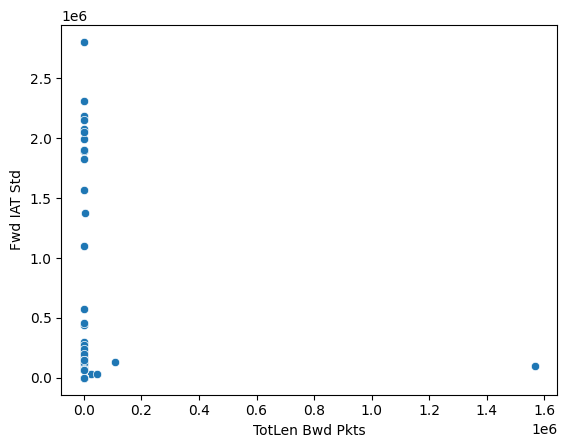

<Figure size 640x480 with 0 Axes>

In [53]:
sns.scatterplot(data = df, x = x, y = y)
plt.show()
plt.savefig('Visualize-DestinationvsBwdPacketLength.jpg')